In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [13]:
def load_img():
  img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, text="ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
  return img

In [14]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")

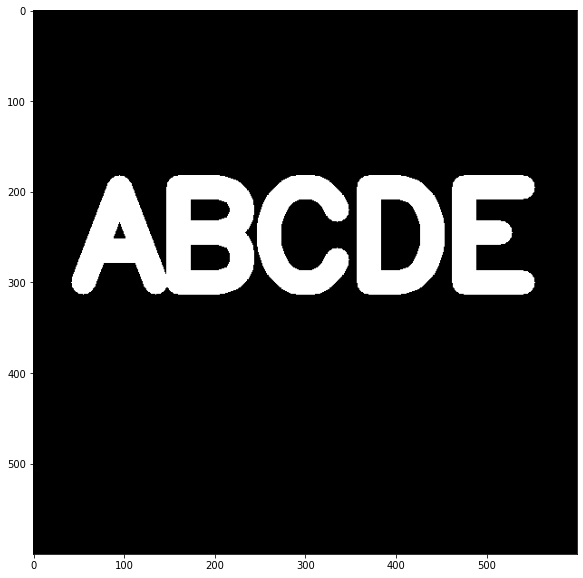

In [15]:
img = load_img()
display_img(img)

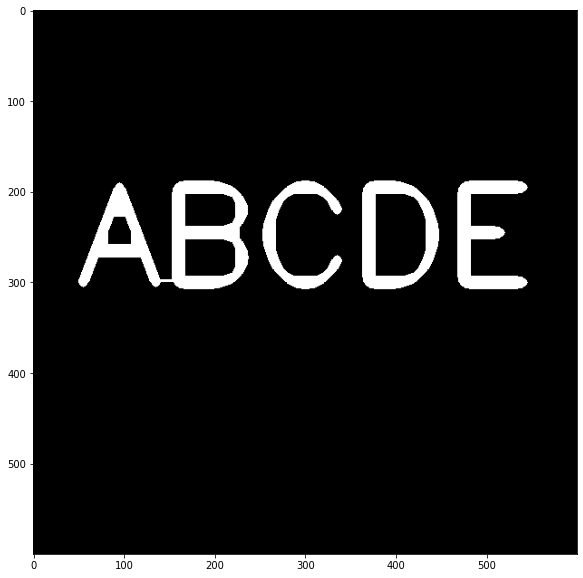

In [21]:
kernel = np.ones((5,5), dtype=np.uint8)
result = cv2.erode(img,kernel,iterations=3)
display_img(result)

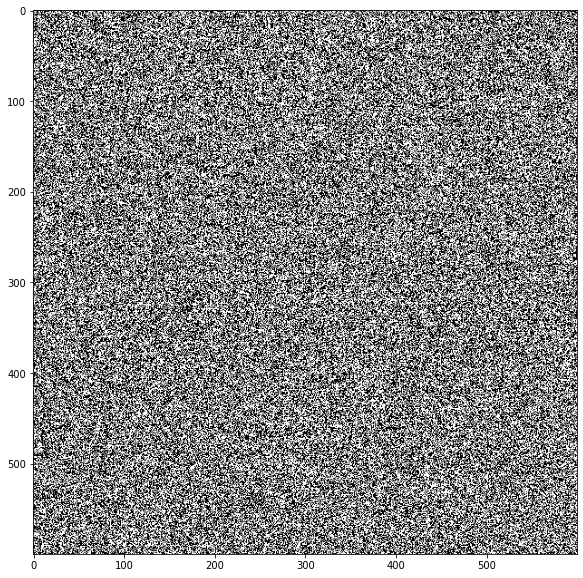

In [22]:
img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))
display_img(white_noise)

In [23]:
white_noise = white_noise * 255

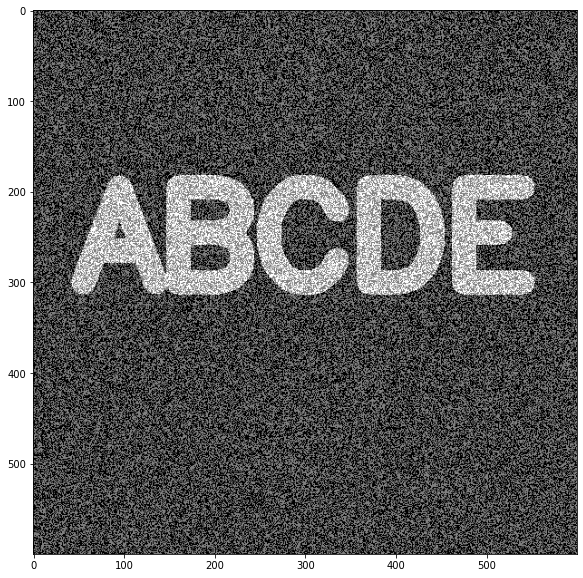

In [24]:
noise_img = white_noise+img
display_img(noise_img)

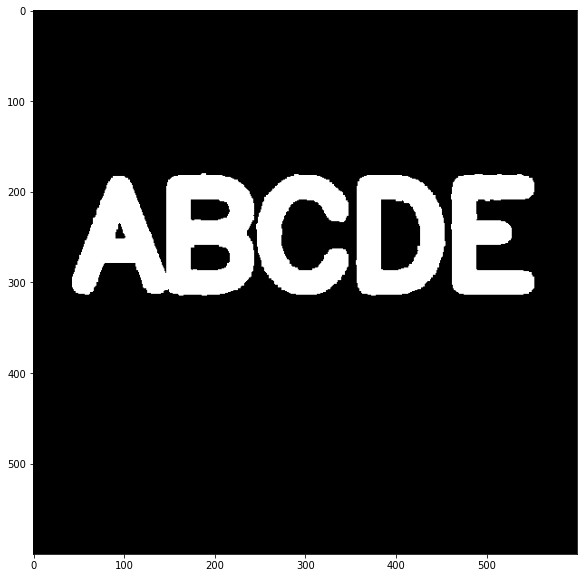

In [25]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

In [26]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise *-255

black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0

In [27]:
black_noise_img.min()

0.0

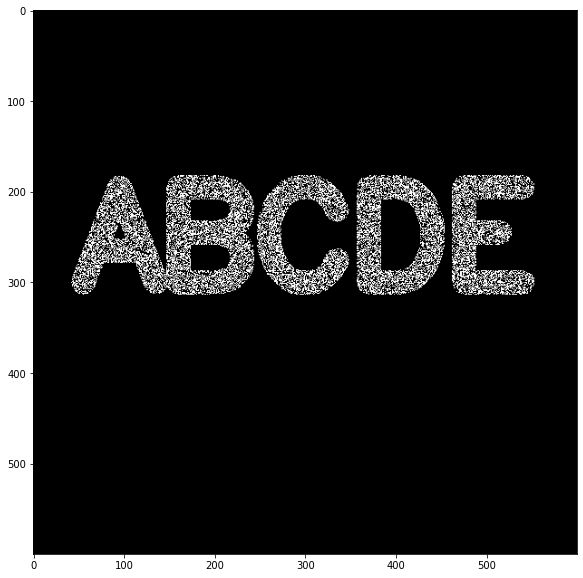

In [28]:
display_img(black_noise_img)

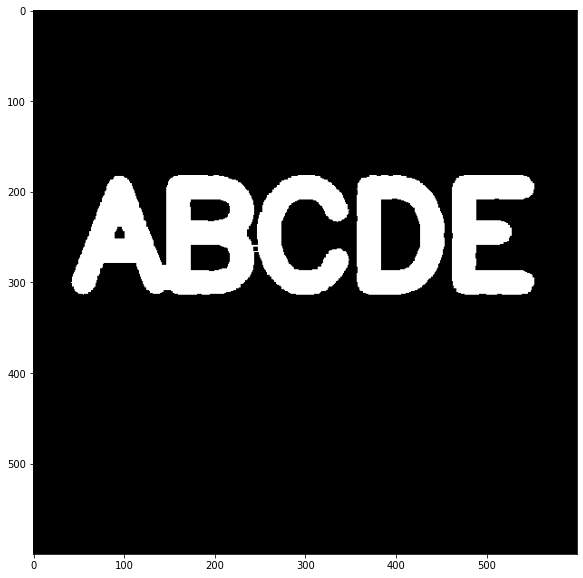

In [30]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

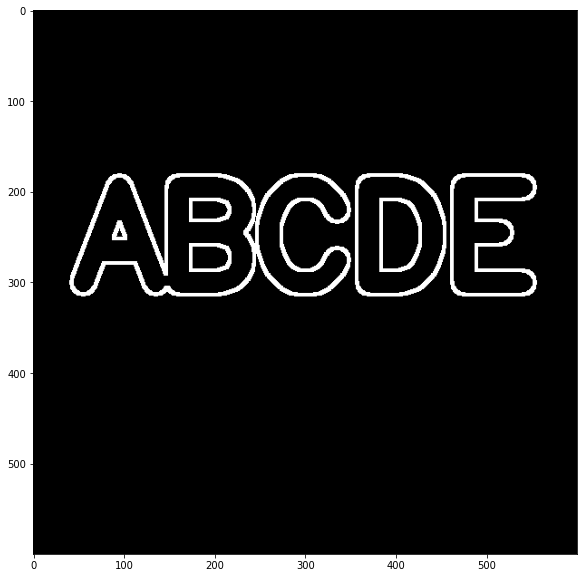

In [31]:
img = load_img()
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)